<a href="https://colab.research.google.com/github/y-patankar/StockMarket/blob/main/3_days_pattern_(Doji).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from pandas.tseries.offsets import BDay
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [14]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import pandas as pd

In [8]:
df=pd.read_csv('filtered_data.csv')

In [9]:
df

,Date,open-5,high-5,low-5,close-5,close-4,close-2,Close,BodySize,CandleSize,Doji
0,6/16/2020,301.350006,302.739990,299.220001,301.359985,299.609985,299.899994,301.290009,0.009979,3.519989,True
1,5/7/2015,144.520004,145.610001,144.009995,144.559998,145.880005,144.070007,142.600006,0.039994,1.600006,True
2,10/14/2016,150.179993,151.000000,149.279999,150.149994,148.699997,149.449997,148.970001,0.029999,1.720001,True
3,3/28/2018,183.610001,184.619995,181.229996,183.610001,188.429993,182.610001,186.250000,0.000000,3.389999,True
4,10/18/2022,473.200012,476.519989,468.829987,473.269989,471.429993,478.179993,499.059998,0.069977,7.690002,True
...,...,...,...,...,...,...,...,...,...,...,...
111,10/27/2016,150.830002,151.460007,149.820007,150.860001,149.759995,146.660004,144.449997,0.029999,1.640000,True
112,3/6/2007,55.709999,56.090000,55.160000,55.720001,56.119999,54.340000,52.959999,0.010002,0.930000,True
113,7/28/2004,41.209999,41.500000,40.349998,41.209999,41.799999,41.099998,41.150002,0.000000,1.150002,True
114,11/25/2016,151.889999,153.419998,151.710007,151.880005,151.250000,150.110001,152.089996,0.009994,1.709991,True


In [10]:
df.set_index('Date', drop=False, inplace=True)
df

,Date,open-5,high-5,low-5,close-5,close-4,close-2,Close,BodySize,CandleSize,Doji
Date,,,,,,,,,,,
6/16/2020,6/16/2020,301.350006,302.739990,299.220001,301.359985,299.609985,299.899994,301.290009,0.009979,3.519989,True
5/7/2015,5/7/2015,144.520004,145.610001,144.009995,144.559998,145.880005,144.070007,142.600006,0.039994,1.600006,True
10/14/2016,10/14/2016,150.179993,151.000000,149.279999,150.149994,148.699997,149.449997,148.970001,0.029999,1.720001,True
3/28/2018,3/28/2018,183.610001,184.619995,181.229996,183.610001,188.429993,182.610001,186.250000,0.000000,3.389999,True
10/18/2022,10/18/2022,473.200012,476.519989,468.829987,473.269989,471.429993,478.179993,499.059998,0.069977,7.690002,True
...,...,...,...,...,...,...,...,...,...,...,...
10/27/2016,10/27/2016,150.830002,151.460007,149.820007,150.860001,149.759995,146.660004,144.449997,0.029999,1.640000,True
3/6/2007,3/6/2007,55.709999,56.090000,55.160000,55.720001,56.119999,54.340000,52.959999,0.010002,0.930000,True
7/28/2004,7/28/2004,41.209999,41.500000,40.349998,41.209999,41.799999,41.099998,41.150002,0.000000,1.150002,True


In [11]:
import pandas as pd

# Exclude the specified columns
columns_to_exclude = ['close-4', 'close-2', 'Close', 'Doji', 'BodySize', 'CandleSize']

# Select only the numeric columns to include in calculations
columns_to_include = [col for col in df.columns if col not in columns_to_exclude and pd.api.types.is_numeric_dtype(df[col])]

# Calculate the minimum and maximum values for the selected numeric columns
df['Row_Min'] = df[columns_to_include].min(axis=1)
df['Row_Max'] = df[columns_to_include].max(axis=1)

# Display the updated DataFrame
df

,Date,open-5,high-5,low-5,close-5,close-4,close-2,Close,BodySize,CandleSize,Doji,Row_Min,Row_Max
Date,,,,,,,,,,,,,
6/16/2020,6/16/2020,301.350006,302.739990,299.220001,301.359985,299.609985,299.899994,301.290009,0.009979,3.519989,True,299.220001,302.739990
5/7/2015,5/7/2015,144.520004,145.610001,144.009995,144.559998,145.880005,144.070007,142.600006,0.039994,1.600006,True,144.009995,145.610001
10/14/2016,10/14/2016,150.179993,151.000000,149.279999,150.149994,148.699997,149.449997,148.970001,0.029999,1.720001,True,149.279999,151.000000
3/28/2018,3/28/2018,183.610001,184.619995,181.229996,183.610001,188.429993,182.610001,186.250000,0.000000,3.389999,True,181.229996,184.619995
10/18/2022,10/18/2022,473.200012,476.519989,468.829987,473.269989,471.429993,478.179993,499.059998,0.069977,7.690002,True,468.829987,476.519989
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10/27/2016,10/27/2016,150.830002,151.460007,149.820007,150.860001,149.759995,146.660004,144.449997,0.029999,1.640000,True,149.820007,151.460007
3/6/2007,3/6/2007,55.709999,56.090000,55.160000,55.720001,56.119999,54.340000,52.959999,0.010002,0.930000,True,55.160000,56.090000
7/28/2004,7/28/2004,41.209999,41.500000,40.349998,41.209999,41.799999,41.099998,41.150002,0.000000,1.150002,True,40.349998,41.500000


In [16]:
X = df.drop(columns=['Doji', 'BodySize', 'CandleSize','Date'])
y = df['close-5']

In [17]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step
    ('xgb', xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42))
])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mse_scores = -scores  # Convert to MSE since cross_val_score returns negative values for MSE
print(f"Cross-validated Mean Squared Error: {mse_scores.mean():.4f} (+/- {mse_scores.std():.4f})")

pipeline.fit(X_train, y_train)
y_test_pred = pipeline.predict(X_test)

# Calculate Mean Squared Error on the test set
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test Mean Squared Error: {test_mse:.4f}")

Cross-validated Mean Squared Error: 778.2353 (+/- 729.9362)
Test Mean Squared Error: 869.4275


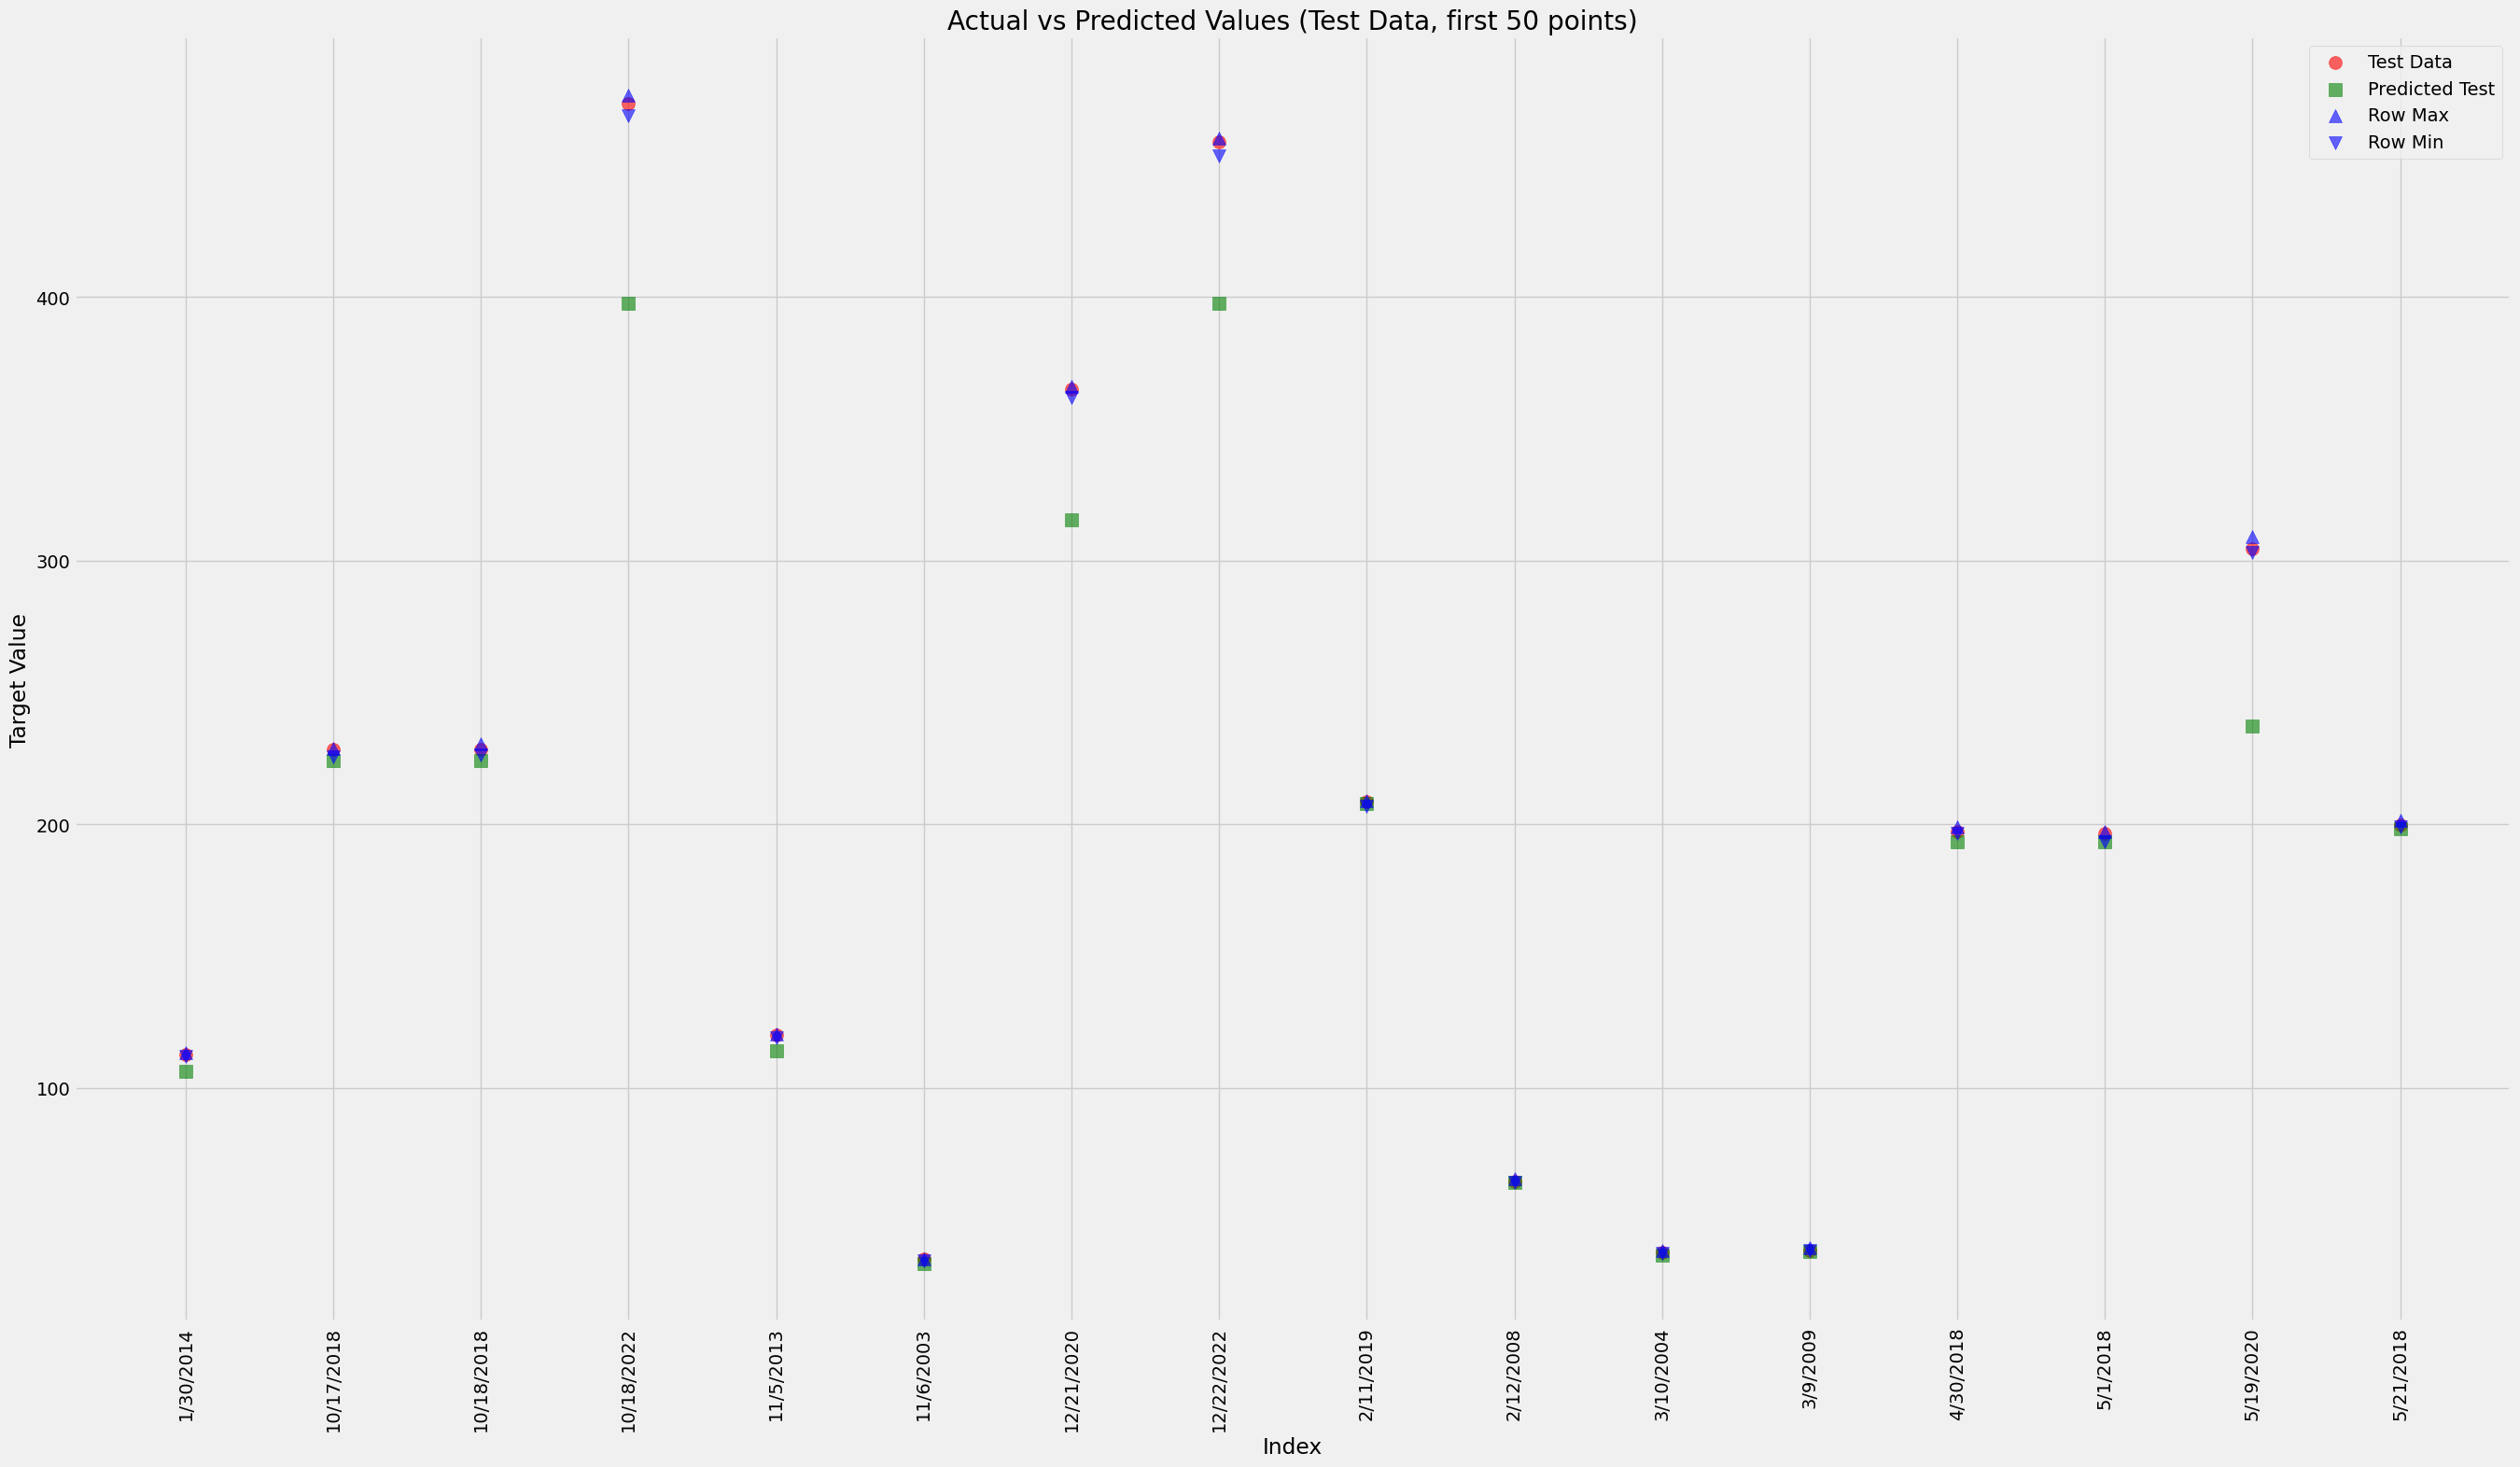

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
y_test_pred_series = pd.Series(y_test_pred[:50], index=X_test.iloc[:50].index)
X_test_subset = X_test.iloc[:50].sort_index()
y_test_subset = pd.Series(y_test[:50], index=X_test_subset.index).sort_index()
y_test_pred_subset = y_test_pred_series.sort_index()

row_max_subset = X_test_subset['Row_Max']
row_min_subset = X_test_subset['Row_Min']
plt.figure(figsize=(30, 17))
plt.scatter(X_test_subset.index[0:16], y_test_subset[0:16], color='red', label='Test Data', alpha=0.6, marker='o', s=100)
plt.scatter(X_test_subset.index[0:16], y_test_pred_subset[0:16], color='green', label='Predicted Test', alpha=0.6, marker='s', s=100)
plt.scatter(X_test_subset.index[0:16], row_max_subset[0:16], color='blue', label='Row Max', alpha=0.6, marker='^', s=100)
plt.scatter(X_test_subset.index[0:16], row_min_subset[0:16], color='blue', label='Row Min', alpha=0.6, marker='v', s=100)

plt.title('Actual vs Predicted Values (Test Data, first 50 points)')
plt.xlabel('Index')
plt.ylabel('Target Value')

# Rotate x-axis tick labels to be vertical
plt.xticks(rotation=90)

# Add legend
plt.legend()

# Show plot
plt.show()